In [1]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
from textblob import Word
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
import pickle 
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv(r'balanced_review.csv')

In [3]:
df

,overall,reviewText,summary
0,5,AS ALWAYS CARHARTT MEANS QUALITY!,Five Stars
1,5,After ordering pair upon pair of tall black bo...,Great affordable boot
2,5,"Product is sturdy, looks good and displays the...",Looks good
3,5,"Great coat, very warm and well made",Five Stars
4,5,Perfect for my Disneybound!,Five Stars
...,...,...,...
791995,1,Too tight. Caused pain and the compression of ...,Too tight. Caused pain and the compression of ...
791996,1,its like plastic doll jewelry,Disappointed
791997,1,The fit was too small.,One Star
791998,1,Measurements were way off!,One Star


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792000 entries, 0 to 791999
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     792000 non-null  int64 
 1   reviewText  791425 non-null  object
 2   summary     791749 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.1+ MB


In [5]:
df.describe(include='all')

,overall,reviewText,summary
count,792000.000000,791425,791749
unique,NaN,738681,419470
top,NaN,Good,Three Stars
freq,NaN,1034,71006
mean,3.000000,NaN,NaN
std,1.290995,NaN,NaN
min,1.000000,NaN,NaN
25%,2.000000,NaN,NaN
50%,3.000000,NaN,NaN
75%,4.000000,NaN,NaN


In [6]:
df=df.drop('summary',1)

In [7]:
df.columns=['overall','review']

In [8]:
df.isna().sum()

overall      0
review     575
dtype: int64

In [9]:
df.dropna(subset=['review'],inplace=True)

In [10]:
df.isna().sum()

overall    0
review     0
dtype: int64

In [11]:
df

,overall,review
0,5,AS ALWAYS CARHARTT MEANS QUALITY!
1,5,After ordering pair upon pair of tall black bo...
2,5,"Product is sturdy, looks good and displays the..."
3,5,"Great coat, very warm and well made"
4,5,Perfect for my Disneybound!
...,...,...
791995,1,Too tight. Caused pain and the compression of ...
791996,1,its like plastic doll jewelry
791997,1,The fit was too small.
791998,1,Measurements were way off!


In [12]:
df['overall'].value_counts()

3    263883
2    131978
1    131901
4    131869
5    131794
Name: overall, dtype: int64

Text(0, 0.5, 'Label')

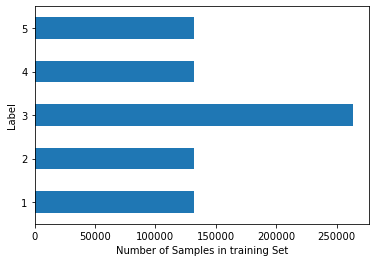

In [13]:
ax = df['overall'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel('Number of Samples in training Set')
ax.set_ylabel('Label')

In [14]:
df['rating']=np.nan
df

,overall,review,rating
0,5,AS ALWAYS CARHARTT MEANS QUALITY!,NaN
1,5,After ordering pair upon pair of tall black bo...,NaN
2,5,"Product is sturdy, looks good and displays the...",NaN
3,5,"Great coat, very warm and well made",NaN
4,5,Perfect for my Disneybound!,NaN
...,...,...,...
791995,1,Too tight. Caused pain and the compression of ...,NaN
791996,1,its like plastic doll jewelry,NaN
791997,1,The fit was too small.,NaN
791998,1,Measurements were way off!,NaN


In [15]:
# 1 is positive and 0 is negative  
df['rating']=np.where(df['overall']>=3,1,0)
df

,overall,review,rating
0,5,AS ALWAYS CARHARTT MEANS QUALITY!,1
1,5,After ordering pair upon pair of tall black bo...,1
2,5,"Product is sturdy, looks good and displays the...",1
3,5,"Great coat, very warm and well made",1
4,5,Perfect for my Disneybound!,1
...,...,...,...
791995,1,Too tight. Caused pain and the compression of ...,0
791996,1,its like plastic doll jewelry,0
791997,1,The fit was too small.,0
791998,1,Measurements were way off!,0


In [16]:
df=df.drop('overall',1)
df

,review,rating
0,AS ALWAYS CARHARTT MEANS QUALITY!,1
1,After ordering pair upon pair of tall black bo...,1
2,"Product is sturdy, looks good and displays the...",1
3,"Great coat, very warm and well made",1
4,Perfect for my Disneybound!,1
...,...,...
791995,Too tight. Caused pain and the compression of ...,0
791996,its like plastic doll jewelry,0
791997,The fit was too small.,0
791998,Measurements were way off!,0


In [17]:
df.to_csv('cleaned_balanced_reviews.csv',index=False)

In [18]:
def clean_reviews(review):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",review.lower()).split())

In [19]:
df['review']=df['review'].apply(clean_reviews)

In [20]:
df

,review,rating
0,as always carhartt means quality,1
1,after ordering pair upon pair of tall black bo...,1
2,product is sturdy looks good and displays the ...,1
3,great coat very warm and well made,1
4,perfect for my disneybound,1
...,...,...
791995,too tight caused pain and the compression of b...,0
791996,its like plastic doll jewelry,0
791997,the fit was too small,0
791998,measurements were way off,0


In [21]:
stop = stopwords.words('english')
def remove_stopwords(df):
    df['review']=df['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [22]:
remove_stopwords(df)
df

,review,rating
0,always carhartt means quality,1
1,ordering pair upon pair tall black boots zappo...,1
2,product sturdy looks good displays watches wel...,1
3,great coat warm well made,1
4,perfect disneybound,1
...,...,...
791995,tight caused pain compression boobs actually l...,0
791996,like plastic doll jewelry,0
791997,fit small,0
791998,measurements way,0


In [23]:
def lemmatization(df):
    df['review']=df['review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))    

In [24]:
lemmatization(df)
df

,review,rating
0,always carhartt mean quality,1
1,ordering pair upon pair tall black boot zappos...,1
2,product sturdy look good display watch well ea...,1
3,great coat warm well made,1
4,perfect disneybound,1
...,...,...
791995,tight caused pain compression boob actually le...,0
791996,like plastic doll jewelry,0
791997,fit small,0
791998,measurement way,0


In [25]:
def wordcloud(df):
    ratings=''.join(df['review'])    
    wordcloud = WordCloud().generate(ratings)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

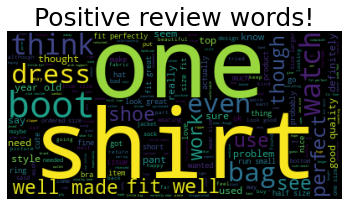

In [26]:
df_pos=df[df['rating']==1]
plt.title("Positive review words!", fontsize=25)
wordcloud(df_pos)

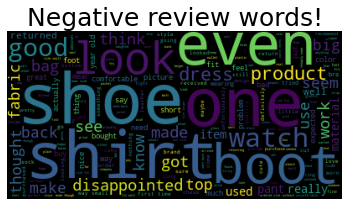

In [27]:
df_neg=df[df['rating']==0]
plt.title("Negative review words!", fontsize=25)
wordcloud(df_neg)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df["review"], df["rating"], test_size = 0.1, random_state = 23)

In [29]:
print('X train shape is {}'.format(x_train.shape))
print('Y train shape is {}'.format(y_train.shape))
print('X test  shape is {}'.format(x_test.shape))
print('Y test  shape is {}'.format(y_test.shape))

X train shape is (712282,)
Y train shape is (712282,)
X test  shape is (79143,)
Y test  shape is (79143,)


In [30]:
x_train

153333    nice color nice fabric size bit large perfect ...
46572                                         fit described
749496                                    sunglass describe
224536    big 2 month old daughter head also bow attache...
741256    seem like quality product however normally wea...
                                ...                        
764700    excited purchase christmas gift mom however go...
727615               well support foot comfortably wear day
339126                                           work great
748017    got daughter wedgie issue standard panty fit w...
652512    well made snugger forefoot expected fit normal...
Name: review, Length: 712282, dtype: object

In [31]:
x_test

437536    going yellow color ended getting salmon sorry ...
597575    worst shirt ever order ordered 2xl like child ...
681904    love pink color little disappointed lopsided n...
637831    ok shirt got fit well decent quality however o...
415081    cautious size elastic take prisoner technicall...
                                ...                        
347595                            small material breathable
273441    everything bra good exception two area underwi...
342514    bought dress carrie inspired halloween costume...
436260    boot exactly wanted quality excellent glad ord...
59165     listened reviewer ordered size daughter 17 mon...
Name: review, Length: 79143, dtype: object

In [32]:
y_train

153333    1
46572     0
749496    1
224536    1
741256    0
         ..
764700    0
727615    1
339126    1
748017    1
652512    1
Name: rating, Length: 712282, dtype: int32

In [33]:
y_test

437536    1
597575    0
681904    1
637831    1
415081    1
         ..
347595    1
273441    1
342514    1
436260    1
59165     1
Name: rating, Length: 79143, dtype: int32

In [34]:
countvectors=CountVectorizer()
x_train_counts=countvectors.fit_transform(x_train)

In [35]:
x_train_counts.shape

(712282, 80219)

In [36]:
transformers=TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_tfids=transformers.fit_transform(x_train_counts)

In [37]:
x_train_tfids.shape

(712282, 80219)

In [38]:
x_test_counts=countvectors.transform(x_test)
x_test_tfids=transformers.transform(x_test_counts)

In [39]:
x_test_tfids.shape

(79143, 80219)

In [40]:
randomforest_model = RandomForestClassifier(n_estimators=100)
randomforest_model.fit(x_train_tfids,y_train)

In [41]:
predictions = randomforest_model.predict(x_test_tfids)
print(predictions)

In [42]:
accuracy_score(y_test,predictions)

In [43]:
lr_model = LogisticRegression(solver = 'liblinear', random_state = 23, max_iter=10000)
lr_model.fit(x_train_tfids,y_train)

LogisticRegression(max_iter=10000, random_state=23, solver='liblinear')

In [44]:
lr_predictions=lr_model.predict(x_test_tfids)

In [45]:
accuracy_score(y_test,lr_predictions)

0.8020924149956408

In [46]:
scaling = MaxAbsScaler().fit(x_train_tfids)
x_train_scaled=scaling.transform(x_train_tfids)
x_test_scaled=scaling.transform(x_test_tfids)

In [47]:
svm_model=svm.SVC(gamma='auto')
svm_model.fit(x_train_scaled,y_train)

In [48]:
svm_predictions=svm_model.predict(x_test_scaled)

In [49]:
accuracy_score(y_test,svm_predictions)

In [50]:
nb_model=MultinomialNB()
nb_model.fit(x_train_tfids,y_train)

MultinomialNB()

In [51]:
nb_predictions=nb_model.predict(x_test_tfids)

In [52]:
accuracy_score(y_test,nb_predictions)

0.7656267768469732

In [53]:
classi = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(solver = 'liblinear', random_state = 23, max_iter=10000)),
])
classi.fit(x_train,y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 LogisticRegression(max_iter=10000, random_state=23,
                                    solver='liblinear'))])

In [54]:
classi.predict(['this is so bad that i love it'])

array([1])

In [55]:
with open('model','wb') as file:
    pickle.dump(classi,file)